# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [2]:
# your code here
def parameters(X, y):
  mean = []
  var = [] 
  #for room i
  for i in range(1, 5):
    mean.append(np.mean(X[np.argwhere(y == i).flatten()], axis = 0))
    var.append(np.var(X[np.argwhere(y == i).flatten()], axis = 0))
  return mean, var

### Calculate priors

Write a function to calculate the priors for each class.

In [3]:
# your code here
def priors(y):
  prior =[]
  for i in range(1, 5):
    prior.append((y==i).flatten().sum()/y.shape[0])
  return prior

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [4]:
class GNB:

  def likelihood(self, test_sample, i):  
    n = np.exp(-((test_sample-self.mean[i])**2)/(2*self.var[i]))
    d = np.sqrt(2*np.pi*self.var[i])
    return n/d

  def fit(self, X, y):
    self.mean, self.var = parameters(X, y)
    self.prior = priors(y)

  def classify(self, test_sample):
    likelihoods = []
    for i in range(0, 4):
      likelihoods.append(np.log(self.prior[i]) + np.sum(np.log(self.likelihood(test_sample, i))))
    return np.argmax(likelihoods)+1

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [5]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')

In [6]:
# your code here
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ws1     2000 non-null   int64
 1   ws2     2000 non-null   int64
 2   ws3     2000 non-null   int64
 3   ws4     2000 non-null   int64
 4   ws5     2000 non-null   int64
 5   ws6     2000 non-null   int64
 6   ws7     2000 non-null   int64
 7   r       2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None
               ws1          ws2          ws3          ws4          ws5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    -52.330500   -55.623500   -54.964000   -53.566500   -62.640500   
std      11.321677     3.417688     5.316186    11.471982     9.105093   
min     -74.000000   -74.000000   -73.000000   -77.000000   -89.000000   
25%     -61.000000   -58.000000   -58.000000   -63.000000   -69.000000   
50%     -55.000000   -56.000000   -55.000000   -56.0000

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [7]:
# your code here
from sklearn.model_selection import train_test_split
X_data = np.array(data.iloc[:, 0:7])
y_data = np.array(data.iloc[:, 7])
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20, random_state = 2)

### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [8]:
# 1.Fitting train Data into Model
model = GNB()
model.fit(X_train, y_train)

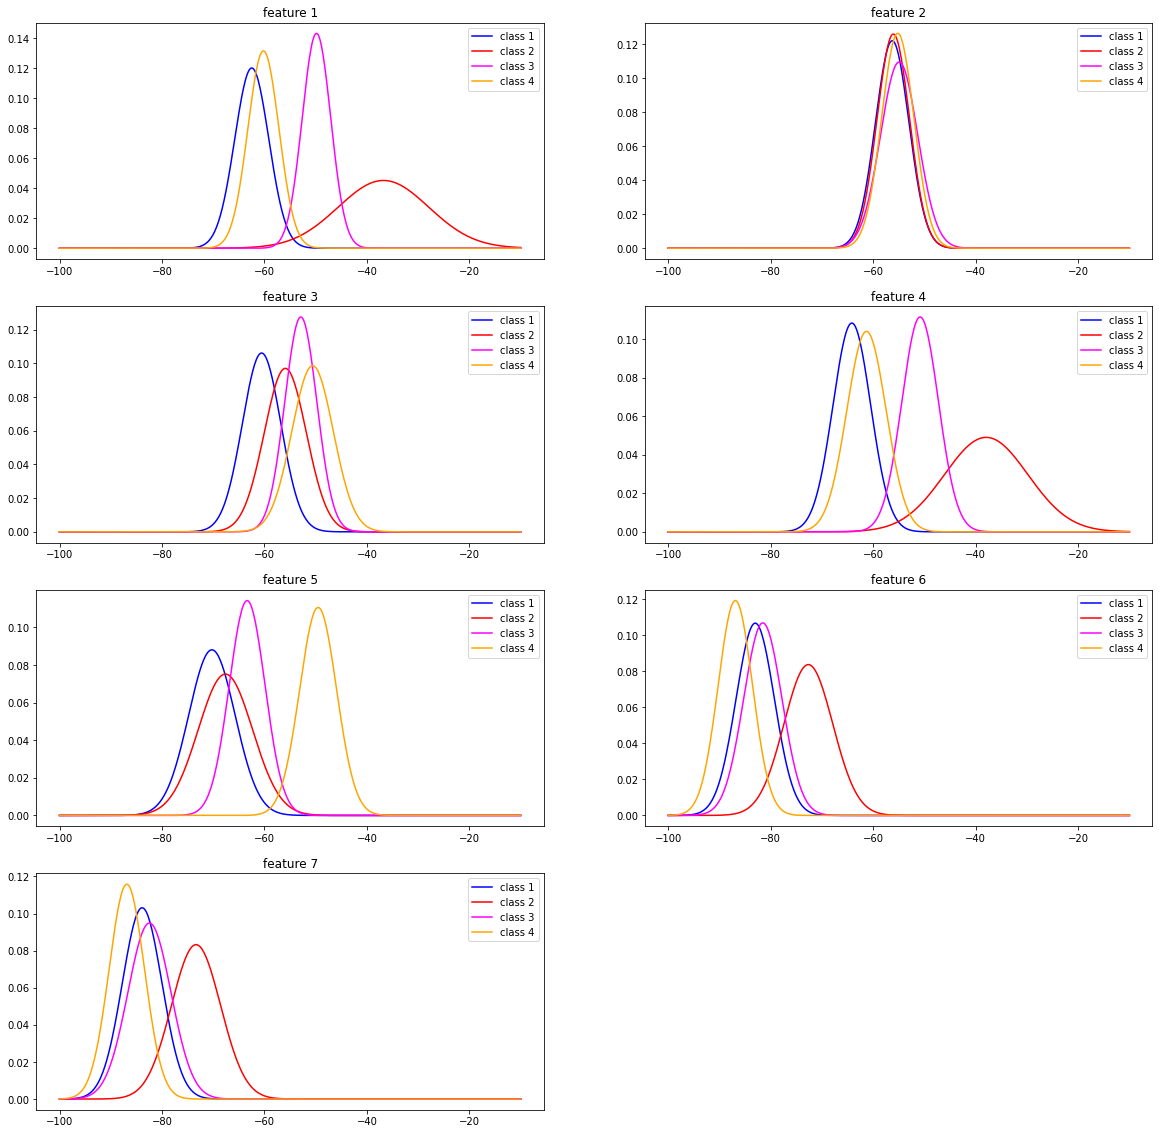

In [9]:
# 2.plotting the Gaussian Distributions of every class for every feature
import scipy.stats as stats
x_axis = np.linspace(-100, -10, 500)
colors = ['blue', 'red', 'magenta', 'orange', 'purple', 'brown', 'green']
plt.figure(figsize = (20, 20))
for i in range(0, 7):
  plt.subplot(4,2,i+1)
  plt.title(f'feature {i+1}')
  for j in range(0, 4):
    plt.plot(x_axis, stats.norm.pdf(x_axis, model.mean[j][i], np.sqrt(model.var[j][i])), color = colors[j], label = f'class {j+1}')
    plt.legend()
plt.show()

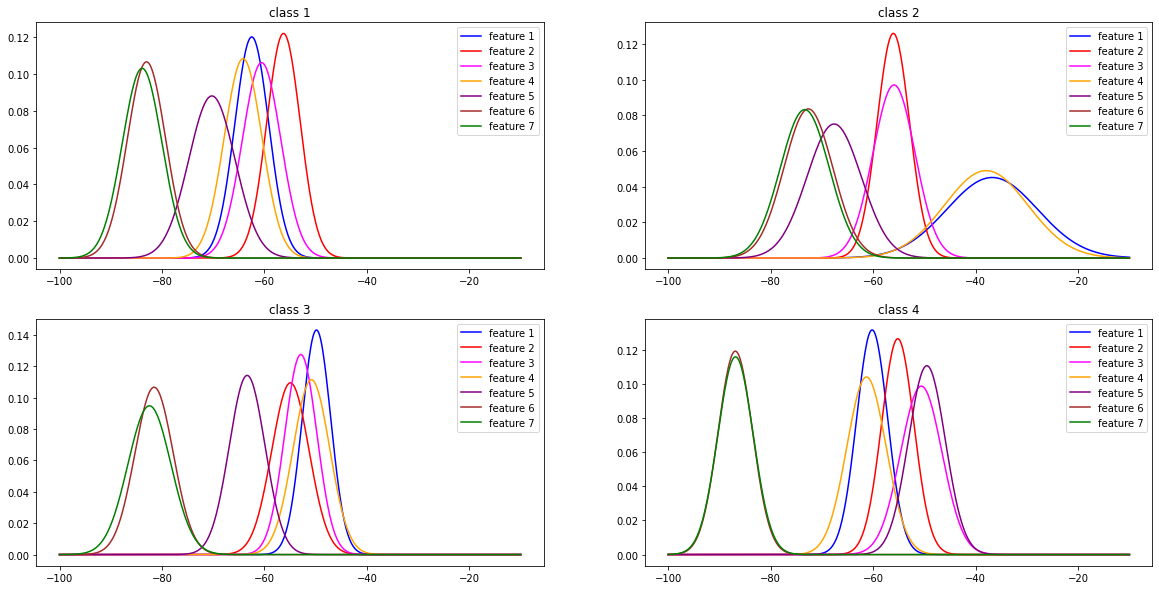

In [10]:
# 2.plotting the Gaussian Distributions of every feature for every class
import scipy.stats as stats
x_axis = np.linspace(-100, -10, 500)
colors = ['blue', 'red', 'magenta', 'orange', 'purple', 'brown', 'green']
plt.figure(figsize = (20, 10))
for i in range(0, 4):
  plt.subplot(2,2,i+1)
  plt.title(f'class {i+1}')
  for j in range(0, 7):
    plt.plot(x_axis, stats.norm.pdf(x_axis, model.mean[i][j], np.sqrt(model.var[i][j])), color = colors[j], label = f'feature {j+1}')
    plt.legend()
plt.show()

***We can see the curves in green and brown are almost overlapping***

***Meaning those features are redundant***

In [11]:
# 3.cheching accuracy on test data
from sklearn.metrics import accuracy_score
prediction = [model.classify(sample) for sample in X_test]
acc = accuracy_score(prediction, y_test)
print(f'Accuracy achieved = {acc*100} %')

Accuracy achieved = 99.5 %


In [12]:
# 4.finding misclassified points
ind = np.argwhere(prediction != y_test).flatten()
miss = X_test[ind]
print('All Missclassified points')
print(miss)
print('\nthere correct classes')
print(y_test[ind])
print('\ntheir predicted classes')
print(np.array(prediction)[ind])

All Missclassified points
[[-46 -59 -55 -49 -69 -74 -84]
 [-44 -57 -53 -46 -67 -78 -79]]

there correct classes
[2 2]

their predicted classes
[3 3]


For point 1


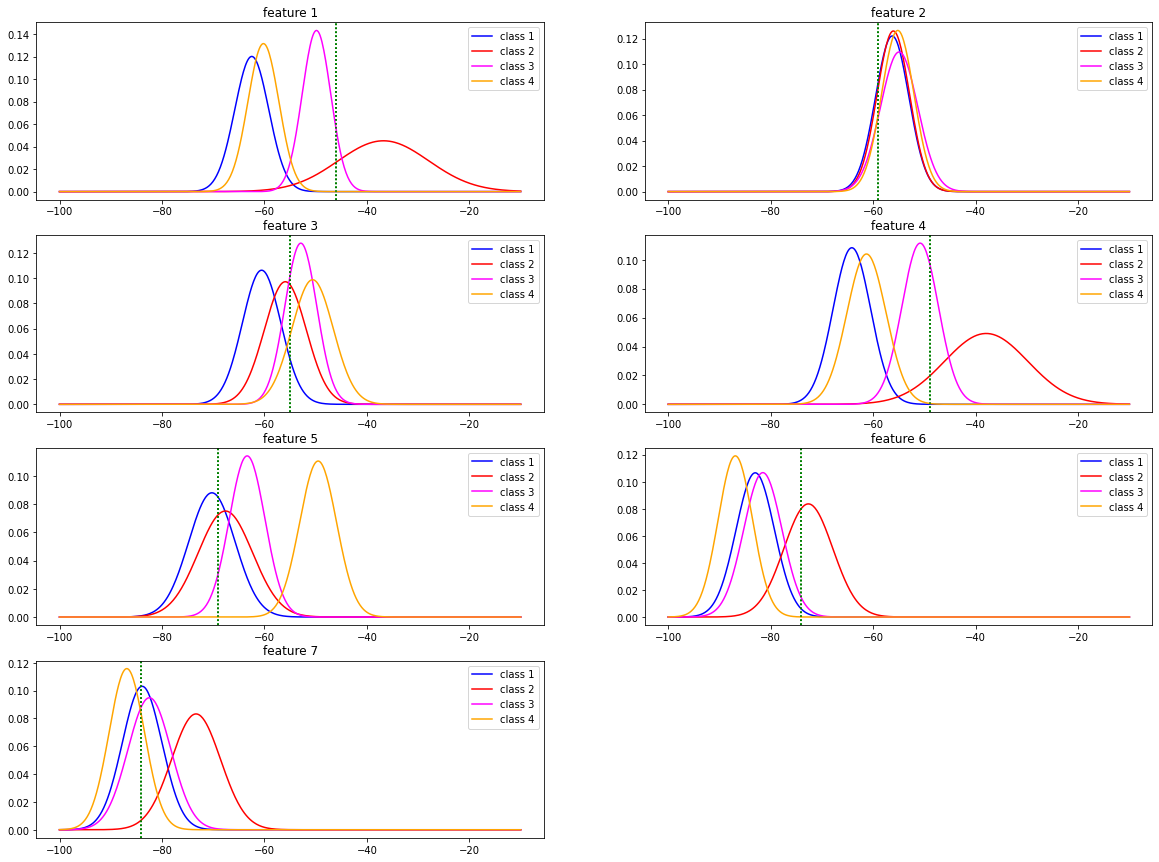

For point 2


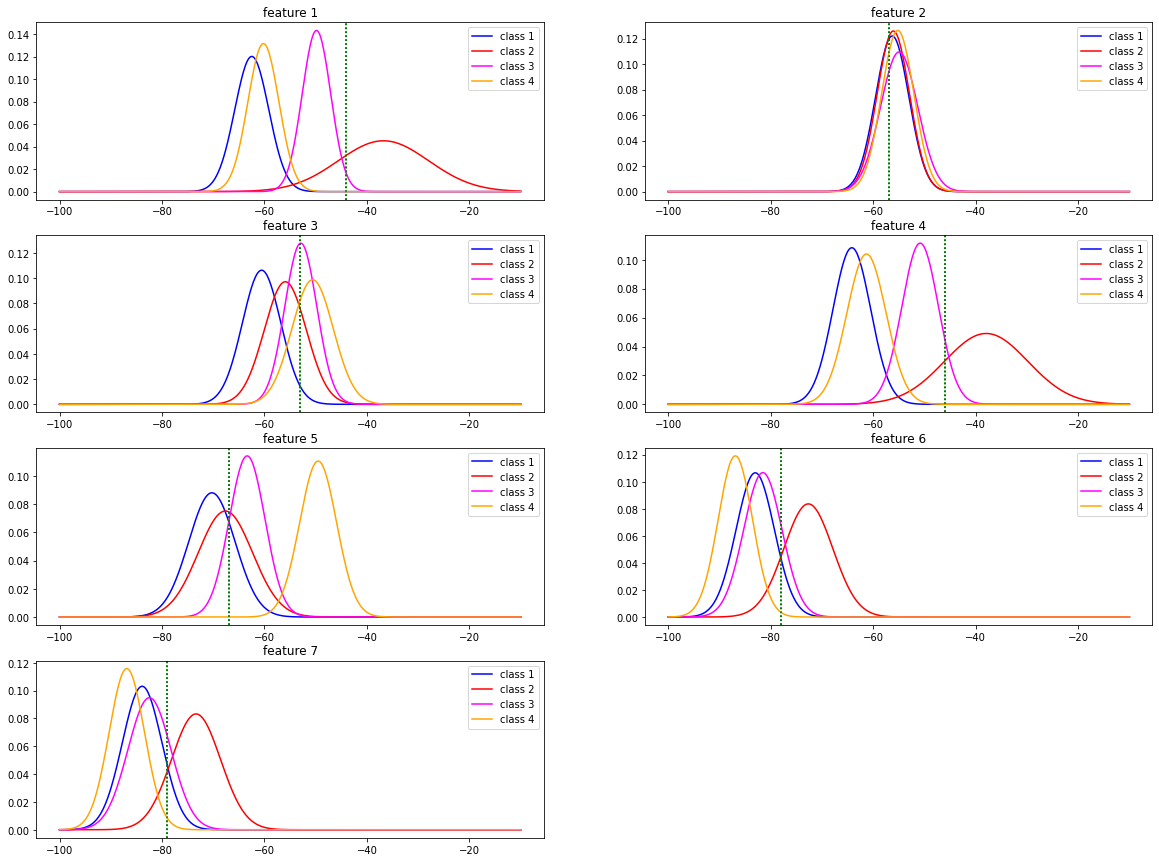

In [13]:
x_axis = np.linspace(-100, -10, 500)
colors = ['blue', 'red', 'magenta', 'orange', 'purple', 'brown', 'green']
for k in [0, 1]:
  print(f'For point {k+1}')
  plt.figure(figsize =(20, 15))
  for i in range(0, 7):
    plt.subplot(4,2,i+1)
    plt.title(f'feature {i+1}')
    for j in range(0, 4):
      plt.plot(x_axis, stats.norm.pdf(x_axis, model.mean[j][i], np.sqrt(model.var[j][i])), color = colors[j], label = f'class {j+1}')
      plt.legend()
      plt.axvline(miss[k][i], color = 'green', linestyle = ':')
  plt.show()

***We observe that due to high overlaping between curves of class 2 and 3 it is difficult for the model to distinguish between them and hence the points are missclassified.***

In [14]:
original = []
dropped = []
for i in range(0, 100):
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20)
  model = GNB()
  model.fit(X_train, y_train)
  prediction = [model.classify(sample) for sample in X_test]
  original.append(accuracy_score(prediction, y_test)*100)
for i in range(0, 100):
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20)
  dropped_X_train = np.delete(X_train, 5, 1)
  dropped_X_test = np.delete(X_test, 5, 1)
  model = GNB()
  model.fit(dropped_X_train, y_train)
  prediction = [model.classify(sample) for sample in dropped_X_test]
  dropped.append(accuracy_score(prediction, y_test)*100)
print(f'Average accuracy over 100 runs before dropping is {np.mean(original)}%')
print(f'Average accuracy over 100 runs when dropping 6th feature is {np.mean(dropped)}%')
print(f'Accuracy increased by {np.mean(dropped)-np.mean(original)}%')

Average accuracy over 100 runs before dropping is 98.275%
Average accuracy over 100 runs when dropping 6th feature is 98.6425%
Accuracy increased by 0.3674999999999926%


***Removing redundant feature improved accuracy***

In [15]:
# 6. Are there certain features that overpower the likelihood scores independently
# doing Sensitivity analysis, removing each feature at a time and observing the change in accuracy.
original = []
dropped = []
for i in range(0, 50):
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20)
  model = GNB()
  model.fit(X_train, y_train)
  prediction = [model.classify(sample) for sample in X_test]
  original.append(accuracy_score(prediction, y_test)*100)
for feature in range(7):
  acc = []
  for i in range(0, 50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20)
    dropped_X_train = np.delete(X_train, feature, 1)
    dropped_X_test = np.delete(X_test, feature, 1)
    model = GNB()
    model.fit(dropped_X_train, y_train)
    prediction = [model.classify(sample) for sample in dropped_X_test]
    acc.append(accuracy_score(prediction, y_test)*100)
  dropped.append(acc)
original_acc = np.mean(original)

print('In this context Accuracy means mean accuracy over 50 runs\n')
print(f'Accuracy before dropping any feature {original_acc}\n')
dropped = np.mean(dropped, axis = 1)
for i in range(7):
  print(f'Accuracy when dropping feature {i+1} is {dropped[i]}')
print('\nIf after removing a feature Accuracy decreases significantly, then it means that feature has high impact on Accuracy')
sorted_index = np.argsort(dropped)+1
print('\nfeatures arranged in order of decreasing importance: ', sorted_index)
print(f'\nTherefore, we can say feature {sorted_index[0]} has highest impact, with accuracy decrease of {original_acc-dropped[sorted_index[0]-1]}%')
print(f'And thus, such feature can overpower the likelihood scores independently.')

In this context Accuracy means mean accuracy over 50 runs

Accuracy before dropping any feature 98.23

Accuracy when dropping feature 1 is 96.535
Accuracy when dropping feature 2 is 98.25
Accuracy when dropping feature 3 is 98.02
Accuracy when dropping feature 4 is 97.39
Accuracy when dropping feature 5 is 94.635
Accuracy when dropping feature 6 is 98.555
Accuracy when dropping feature 7 is 98.11

If after removing a feature Accuracy decreases significantly, then it means that feature has high impact on Accuracy

features arranged in order of decreasing importance:  [5 1 4 3 7 2 6]

Therefore, we can say feature 5 has highest impact, with accuracy decrease of 3.594999999999999%
And thus, such feature can overpower the likelihood scores independently.


In [16]:
acc = []
for i in range(0, 50):
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20)
  dropped_X_train = np.delete(X_train, [6, 2, 1, 5], 1)
  dropped_X_test = np.delete(X_test, [6, 2, 1, 5], 1)
  model = GNB()
  model.fit(dropped_X_train, y_train)
  prediction = [model.classify(sample) for sample in dropped_X_test]
  acc.append(accuracy_score(prediction, y_test)*100)
print(f'Mean Accuracy over 50 runs, only using feature 5, 1 and 4 is {np.mean(acc)}')

Mean Accuracy over 50 runs, only using feature 5, 1 and 4 is 97.89


We see that the accuracy is still very good and only reduces slightly

In [17]:
# 7 Compare your results with the scikit-learn implementation
from sklearn.naive_bayes import GaussianNB
predictions = GaussianNB().fit(X_train, y_train).predict(X_test)
acc = accuracy_score(predictions, y_test)
print(f'Accuracy achieved using scikit-learn implementation = {acc*100} %')
print('Accuracy of my implementation is higher than scikit-learn implementation.')

Accuracy achieved using scikit-learn implementation = 98.5 %
Accuracy of my implementation is higher than scikit-learn implementation.
